In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [20]:
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
data = data.rename(columns={"YearsExperience":"ye"})
data.head()

,ye,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


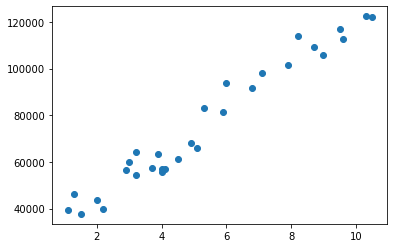

In [14]:
plt.scatter(data.ye,data.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x235d401b760>,
 'caps': [<matplotlib.lines.Line2D at 0x235d401bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235d401b310>],
 'medians': [<matplotlib.lines.Line2D at 0x235d4029520>],
 'fliers': [<matplotlib.lines.Line2D at 0x235d40298b0>],
 'means': []}

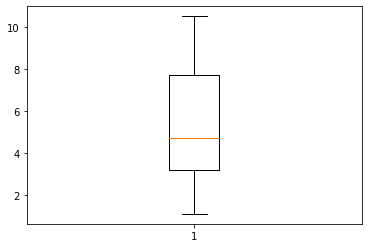

In [15]:
plt.boxplot(data.ye)

{'whiskers': [<matplotlib.lines.Line2D at 0x235d4081bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x235d4090340>,
 'boxes': [<matplotlib.lines.Line2D at 0x235d4081820>],
 'medians': [<matplotlib.lines.Line2D at 0x235d4090a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x235d4090df0>],
 'means': []}

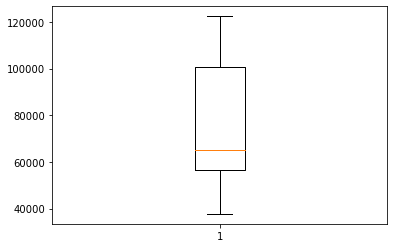

In [16]:
plt.boxplot(data.Salary)

In [18]:
#crete model
model = smf.ols("Salary~ye",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        19:39:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='ye', ylabel='Salary'>

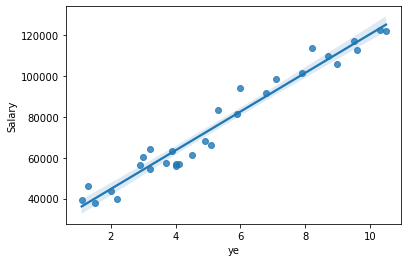

In [19]:
sns.regplot(x="ye",y="Salary",data=data)

In [35]:
new_data = pd.Series([1.1,10.3])
pred = pd.DataFrame(new_data,columns=["ye"])
pred

,ye
0,1.1
1,10.3


In [26]:
model.predict(pred)

0     36187.158752
1    123126.812110
dtype: float64

In [32]:
data["Prediction"] = model.fittedvalues
data

,YearsExperience,Salary,Prediction
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
